In [18]:
import tensorflow as tf


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3) # train




Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8654 - loss: 0.4765
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9644 - loss: 0.1148
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9774 - loss: 0.0711


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

In [ ]:
model.save('num_reader.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicția modelului: 7


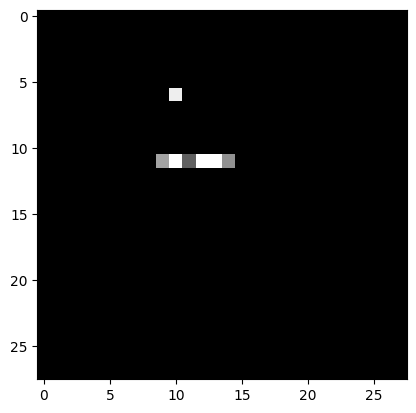

In [19]:
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

img = cv2.imread('numar.png', cv2.IMREAD_GRAYSCALE)  # Citește imaginea în tonuri de gri
img = cv2.resize(img, (28, 28))  # Redimensionează la 28x28
img = np.invert(img)  # Inversează culorile (MNIST are cifre negre pe fundal alb)
img = img / 255.0  # Normalizează între 0 și 1
plt.imshow(img, cmap='gray')  # Afișează imaginea
#plt.show()

img = img.reshape(1, 28, 28)  # Transformă într-un array de forma (1, 28, 28)
prediction = model.predict(img)
predicted_label = np.argmax(prediction)  # Extrage clasa cu probabilitatea cea mai mare
print(f"Predicția modelului: {predicted_label}")




